<a href="https://colab.research.google.com/github/haileybella/Stockwell/blob/main/StockWell_Measuring_the_Financial_Wellness_of_S%26P_500_Companies_(_KWK_Machine_Learning_x_Finance_Challenge)_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#StockWell: Measuring the Financial Wellness of S&P 500 Companies
---

## ⚠️ Agreement Not to Use AI Tools in This Text Cell

By completing this text cell, you confirm that **you did not use any AI tools or large language models (LLMs) to generate text, code, or analysis for its content**.  

*Purpose:* This ensures that your insights, reasoning, and work in this section are fully your own.  

**Please write your responses/code manually.**

-----------------

## Research Question / Problem Statement
Investors, students, and the public often struggle to understand if a company is financially "healthy" or stable from raw stock data. Traditional financial indicators can be confusing or inaccessible, and existing scoring systems are proprietary or not accessible to the public.

Can we use machine learning to predict a company’s near-future financial stability using key financial indicators like EBITDA, revenue growth, market capitalization, and current stock price?

-----------------

## List of Datasets
**Instructions:** Include dataset name, source/link, and a brief description. Explain why you chose it.
1. S&P 500 Stocks (daily updated) by LARXEL

"The Standard and Poor's 500 or S&P 500 is the most famous financial benchmark in the world.

This stock market index tracks the performance of 500 large companies listed on stock exchanges in the United States. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of this index.

Because the index includes multiple classes of stock of some constituent companies—for example, Alphabet's Class A (GOOGL) and Class C (GOOG)—there are actually 505 stocks in the gauge." - Larxel

-----------------

## Summary of Dataset Use

**Instructions:** For each model you train, fill out the following section (template to copy/pase is below this list):
1.  Model type (e.g. linear regression)
2.  Dataset(s) used
3.  The metric(s) you used to evaluate the model (e.g. accuracy, f1 score, R-squared, RMSE, feature importance)
4.  The key insight(s) you discovered through training and evaluating your model.
5.  Did you use AI or LLMs to support your work on this model? If so, briefly, what did you use them for? (e.g. code generation, asking conceptual questions, etc.)

#### Model 1
*   **Model type**: Random Forest Regressor

*   **Dataset(s) used**: S&P 500 Companies (Larxel)

*   **Metric(s) used**: MAE, RMSE, R²

*   **Key tnsight(s)**: Market cap dominates FHS prediction

*   **AI/LLM use (if any)**: Used LLM for debugging & FHS Score checking my scaling calculations.

-----------------

### Overall AI/LLM Usage
**Instructions:**
I used AI tools to tutor me when I got stuck with code and this was mainly used for creating the Financial Health Score (FHS) and checking my scaling calculations.

-----------------

## Results
The Random Forest Model showed that it can predict the Financial Health Score (FHS). When I looked at the features, Market Capitalization is the strongest predictor of the future finacial health of a company shorterm. Compared to Current Price, EBITDA, and Revenue Growth. This shows that company size plays a major role in predicting short-term financial performance and the next Financial Health Score. The Model's Errors (MAE aroung 0.88 - 0.92) showed me that the predictions where close to the real values. The model was consistent and gave me insight on which financial factors matter the most.

-----------------

## Conclusion and Recommendations
This project showed me that machine learning can be used to estimate a company's short-term financial future by using financial indicators like EBITDA, revenue growth, market cap and stock price. Creating the FHS, I took inspiration from the Altman Z-Score, to meausre finacial stability of companies. My simplified version follows the same idea by standarizing metrics and summing them to capture profitability, growth, valuation and size in one score.

After training the Random Forest Model, it showed me that a companies Market Cap is a strong indicator of a companies preformance.

For future improvements I would like to add more advanced models like the Gradient Boosting (XGBoost), since they work well with financial data (especially ones with a lot of outliers).

Overall, this project shows that machine learning can be applied to create a financial health score of a company that anyone can understand similarily to a credit score. Applying machine learning is helpful because it recoginzes patterns and is able to turn them into one score that can tell us if a company looks strong or risky. The main concept is to make financial analysis more accesible for people who want to learn about companies.

-----------------

## References
**Instructions:** Include links to any additional resources, articles, etc. that you used to help interpret results, draw conclusions, and/or make recommendations
1. Kenton, Will. “S&P 500 Index: What It’s for and Why It’s Important in Investing.” Investopedia, Investopedia, 20 Nov. 2025, www.investopedia.com/terms/s/sp500.asp.
2. Mulani, Safa. “Using StandardScaler() Function to Standardize Python Data.” DigitalOcean, DigitalOcean, 3 Aug. 2022, www.digitalocean.com/community/tutorials/standardscaler-function-in-python.

* I hade to scale my numeric feautres because the values I had where skewed and I had outliers. For the FHS Score.

3. Kartik. (2025, August 2). Logistic regression in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/

4. Tardi, C. (n.d.). Composite index: Definition, types, and examples. Investopedia. https://www.investopedia.com/terms/c/compositeindex.asp

5. Altman’s Z-score model. Corporate Finance Institute. (2023, October 27). https://corporatefinanceinstitute.com/resources/commercial-lending/altmans-z-score-model/

6. Alexzap. (2025, October 4). Navigating the Financial Maze in an Era of Volatility — 1. Track These 60+ Fundamental Measures in Python. Medium. https://wire.insiderfinance.io/navigating-the-financial-maze-in-an-era-of-volatility-1-bb7c1c6659b7

* Websites (3-6) helped me make the Financial Health Score (FHS).

7. Stock price prediction using machine learning in Python. GeeksforGeeks. (2025, August 6). https://www.geeksforgeeks.org/machine-learning/stock-price-prediction-using-machine-learning-in-python/

8. GeeksforGeeks. (2025a, September 3). Gradient boosting in ML. https://www.geeksforgeeks.org/machine-learning/ml-gradient-boosting/


##Loading Data

In [6]:
# For more information on this, see this link: https://colab.research.google.com/notebooks/io.ipynb
from google.colab import drive
drive.mount('/content/drive')

#Basic import statements
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

#Replace the path below with the path to the file on your own Google Drive.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sp500_companies.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 non-null    flo

##STAT1.1.1 - Data Types

Overview of the data in the table

| Column Name   | Description                          | Data Type                      | Explanation                                                                          |
| ------------- | ------------------------------------ | ------------------------------ | ------------------------------------------------------------------------------------ |
| `Exchange` | stock extchange (NYSE, NASDAQ).| **Nominal qualitative** |Regulated market where investors buy and sell stocks |
| `Symbol`    | Label on the stock   | **Nominal qualitative** |Identifier labels, not measurable.|
| `Shortname`      | short company name        | **Text/String** |Abbreviated or common name of the company. |
| `Longname`        | long company name                |  **Text/String** |Full legal name of the company. |
| `Sector`         | broad category to group companies with similar activities (ex: Technology)                  | **Nominal qualitative data** |High-level business category (Technology, Healthcare, Finance) |
| `Industry`         | classification of companies (11 sectors)                         |  **Nominal qualitative** |More specific category inside a sector (e.g., Semiconductors, Banks)|
| `CurrentPrice`       |  most recent price of an asset  |  **Continuous quantitative** |The current stock trading price |                                                          
| `Marketcap`       | total value of a company's shares of stock   |  **Discrete quantitative** | Total market value of the company (shares × price). Integer value representing scale and size.|
| `Ebitda`      | Earnings Before Interest, Taxes, Depreciation, and Amortization                        | **Continuous quantitative** |provides a clearer picture of a company's core performance by excluding financing costs (interest), tax rates, and non-cash charges like depreciation and amortization |
| `Revenuegrowth`        | percentage increase in a company's total sales over a specific period                      | **Continous qualitative** | Annual revenue growth rate (e.g., 0.12 = 12%). Allows negative or positive decimals. |
| `City`       | City of where company is based.                     | **Nominal qualitative** | City where the company is headquartered.|
| `State`    | state of where company is based. |**Nominal Qualitative** | State where the company is based.
| `Country` | Region | **Nominal Qualitative** |Country of headquarters.|
| `Fulltimeemployees`    | A number of employees at the company that work fulltime.   | **Discrete Quantitative** |Number of employees|
| `Longbusinesssummary`      | A summary of the companies business.        | **Text/String** |Long description of the company’s operations and business model. |
| `Weight`        | wieght in S&P 500 index               |  **Continuous quantitative** |The company’s weight in the S&P 500 index. Is a decimal value that represents the percentage impact. |

###Calculating Measures of Central Tendency

In [8]:
# select the colums to analyze
cols = ["Ebitda", "Revenuegrowth", "Currentprice", "Marketcap"]

# Loop throguh each column and compute measure of spread
for col in cols:
    print(f"\n---{col.upper()} ---")

    #Calculate Mean
    mean_value = df[col].mean()
    print(f"Mean: {mean_value:.2f}")

    #Calculate Median
    median_value = df[col].median()
    print(f"Median: {median_value:.2f}")

    #Calculate Mode
    mode_value = df[col].mode()
    print(f"Mode: {list(mode_value.values)}")



---EBITDA ---
Mean: 7045285743.51
Median: 2952748032.00
Mode: [np.float64(1270000000.0), np.float64(3025999872.0), np.float64(3571000064.0), np.float64(123469996032.0)]

---REVENUEGROWTH ---
Mean: 0.07
Median: 0.05
Mode: [np.float64(0.013)]

---CURRENTPRICE ---
Mean: 217.89
Median: 118.37
Mode: [np.float64(88.95), np.float64(112.03), np.float64(343.65)]

---MARKETCAP ---
Mean: 110722171760.19
Median: 37063958528.00
Mode: [np.int64(4664099328), np.int64(6260525568), np.int64(6697217024), np.int64(6972155904), np.int64(6973593600), np.int64(7452174848), np.int64(7460544000), np.int64(7521534464), np.int64(7596251648), np.int64(7645714944), np.int64(7783685632), np.int64(7788795392), np.int64(8032467456), np.int64(8246310400), np.int64(8274409984), np.int64(8476832256), np.int64(8677667840), np.int64(8705227776), np.int64(8856579072), np.int64(9182754816), np.int64(9243351040), np.int64(9297047552), np.int64(9499572224), np.int64(9579524096), np.int64(9587324928), np.int64(9653395456), n

### 💭 Reflection: Interpreting Correlations

**EBITDA (Operating Profibility)**
*   **Mean**: $7.0 Billion

*   **Median**: $2.95 Billion
*   **Mode**: Several Value (not a single dominant value)

*   **Interpretation:** EBITDA has a large mean compared to the median because the data is right-skewed. This is caused by companies (like Apple, Microsoft, and Amazon), since they have large EBITDA numbers that raise the average. Where most S&P 500 companies have an EBITDA closer to the median ($3 billion).



**Revenue Growth**
*   **Mean**: 7%

*   **Median**: 5%
*   **Mode**: 1.3%

*   **Interpretation:** Similar to the EBITDA results, the mean is right-skewed, and most companies grow 5% each year. The Mode allows us to understand that most companies grow slowly at 1.3%.

**Current Price**
*   **Mean**: $217.89

*   **Median**: $118.37

*   **Mode**: 88.95, 112.03, 343.65

*   **Interpretation:** The mean is double the price, which shows me that some stock prices are so expensive that it causes the mean to double. As well, the median is the most accurate pricing of a stock price in the S&P 500.

**Market Cap**
*   **Mean**: 110,722,171,760.19 ($110 billion roughly)

*   **Median**: 37,063,958,528 ($37 billion roughly)
*   **Mode**: There are several values because the MarketCap is continous, so the mode isn't a meangiful measure for this.

*   **Interpretation:** The mean market cap was very high, practically being triple the amount of the median. This large gap shows how some really big companies influence the S&P 500. The median is a more accurate representation of an average company in the market cap.

### Calculate the Spread and Variation

In [9]:
cols = ["Ebitda", "Revenuegrowth", "Currentprice", "Marketcap"]

for col in cols:
    print(f"\n--- {col.upper()} ---")

    #min & max
    min_val = df[col].min()
    max_val = df[col].max()

    #range
    range_val = max_val - min_val

    #interquartile deviation 75th percentile (Q3) - 25th perentile (Q1)
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 -q1

    #standard deviation
    std_deviation = df[col].std()

    #print results
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    print(f"Range: {range_val}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {std_deviation}")


--- EBITDA ---
Min: -3991000064.0
Max: 149547008000.0
Range: 153538008064.0
IQR: 4394999808.0
Standard Deviation: 16242128052.501644

--- REVENUEGROWTH ---
Min: -0.602
Max: 1.632
Range: 2.234
IQR: 0.107
Standard Deviation: 0.18024695190297257

--- CURRENTPRICE ---
Min: 9.4
Max: 8276.78
Range: 8267.380000000001
IQR: 159.12
Standard Deviation: 489.20502652018973

--- MARKETCAP ---
Min: 4664099328
Max: 3846819807232
Range: 3842155707904
IQR: 58971479040.0
Standard Deviation: 344007401496.96796


###Visual Representation

<function matplotlib.pyplot.show(close=None, block=None)>

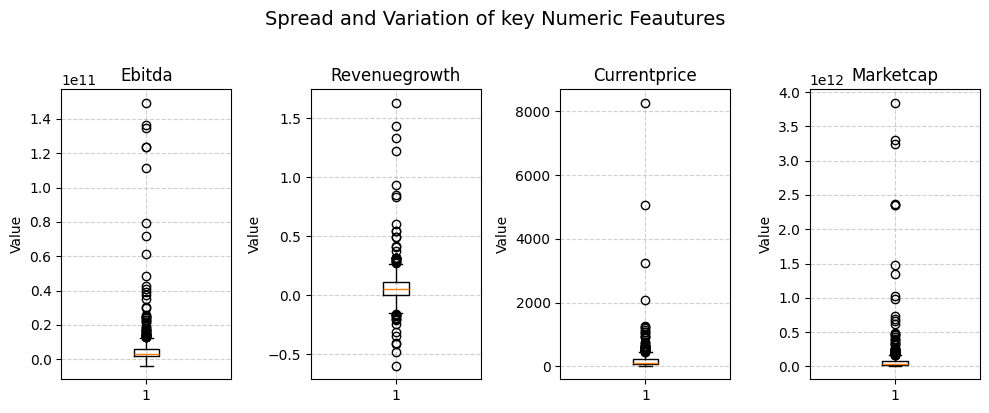

In [10]:
cols = ["Ebitda", "Revenuegrowth", "Currentprice", "Marketcap"]

#create a row of 4 subplots (one for each variable), figure is 10 *4
fig, axes = plt.subplots(nrows =1, ncols =4, figsize=(10, 4))

#Loop over each column and it's corresponding subplot axis
for i, col in enumerate(cols):
    #make a box plor for this column
    axes[i].boxplot(df[col].dropna(), vert = True)
    #set the title of this sublot to the column name
    axes[i].set_title(col)
    #label the y-axis
    axes[i].set_ylabel("Value")
    #add a grid for readbility
    axes[i].grid(True, linestyle="--", alpha=0.6)

#title
plt.suptitle("Spread and Variation of key Numeric Feautures", fontsize=14, y=1.02)
#adjust layout
plt.tight_layout()
#plot
plt.show

### Reflection
From the spread and variation of the EBITDA, revenue growth, current price, and market cap of the companies in the S&P 500, there are differences in scale; the data is very skewed, and there are many outliers. This allows me to know that I need to scale and choose the right features to build a fair and accurate Financial Health Score.

### Cleaning Data
We need to do the following:

*   Fill missing `EBITDA` `Revenue Growth` `Fulltime Employees` values with the median.
*   Drop the columns: `Longname` `Shortname` `City` `Country` `Exchange` `State`
*   Convert `Sector` `Industry` to numeric values before modeling.

In [11]:
#Fill missing Ebitda values with the median.
median_Ebitda = df['Ebitda'].median()
df['Ebitda'] = df['Ebitda'].fillna(median_Ebitda)

#Fill missing Revenue Growth values with the meidan.
median_Revenuegrowth = df['Revenuegrowth'].median()
df['Revenuegrowth'] = df['Revenuegrowth'].fillna(median_Revenuegrowth)

#Fill missing Fulltimeemployees values with the meidan.
median_Fulltimeemployees = df['Fulltimeemployees'].median()
df['Fulltimeemployees'] = df['Fulltimeemployees'].fillna(median_Fulltimeemployees)

#Drop the columns: Longname, Shortname, City, Country, Exchange, State, Longbusinesssummary, Sysmbol
df.drop(columns=['Longname', 'Shortname', 'City', 'Country', 'Exchange', 'State', 'Longbusinesssummary', 'Symbol'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sector             502 non-null    object 
 1   Industry           502 non-null    object 
 2   Currentprice       502 non-null    float64
 3   Marketcap          502 non-null    int64  
 4   Ebitda             502 non-null    float64
 5   Revenuegrowth      502 non-null    float64
 6   Fulltimeemployees  502 non-null    float64
 7   Weight             502 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 31.5+ KB


In [12]:

#Convert Sector Industry to numeric values before modeling.
df = pd.get_dummies(df, columns =['Sector', 'Industry'])

##Financial Health Score (FHS)
Inspired by the Altman Z-Score, I constructed a simplified Financial Health Score (FHS) using four key financial metrics from the S&P 500: profitablity  `EBITDA`, growth `Revenue Growth`, valuation `Current Price`, and size/stability `Market Cap`. Each metric was standardized using the Z-Score normalization to account for differences in scale, ensuring that a single metric won't dominate the score. The standardized values are then summed to produce the FHS:


$$
FHS = \frac{E - \mu_E}{\sigma_E} + \frac{R - \mu_R}{\sigma_R} + \frac{P - \mu_P}{\sigma_P} + \frac{M - \mu_M}{\sigma_M}
$$

The resulting score provides a comparative measure of financial health across companies, with higher scores indicating stronger financial positions.








####Calculate FHS Score

In [13]:
#Scale numeric columns for logistic regression
from sklearn.preprocessing import StandardScaler

#Make scaler
scaler = StandardScaler()

#List columns
num_cols = ["Ebitda", "Revenuegrowth", "Currentprice", "Marketcap"]

#Apply the function to the dataset using the fit_transform() function
df[num_cols] = scaler.fit_transform(df[num_cols])

#check (Values must be close to 0)
print(df[num_cols].mean())
print(df[num_cols].std())

#Create FHS as sum of standarized columns
df['FHS'] = df[num_cols].sum(axis =1)
print(df['FHS'].head())

Ebitda           0.000000e+00
Revenuegrowth    7.077119e-17
Currentprice     0.000000e+00
Marketcap       -2.830848e-17
dtype: float64
Ebitda           1.000998
Revenuegrowth    1.000998
Currentprice     1.000998
Marketcap        1.000998
dtype: float64
0    18.996801
1    18.978101
2    18.292633
3    13.434858
4    14.309022
Name: FHS, dtype: float64


#Model 1: Random Forest Model


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- 1. Make next Financial Health Score ---
df['FHS_next'] = df['FHS'].shift(-1)

# --- 2. Drop last row ---
df = df.dropna(subset=['FHS_next'])

# --- 3. Define X and y ---
X = df[["Ebitda", "Revenuegrowth", "Currentprice", "Marketcap"]]
y = df["FHS_next"]

# --- 4. Split into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

# --- 5. Minimal Random Forest Tuning ---
configs = [
    {'n_estimators': 100, 'max_depth': 4},
    {'n_estimators': 300, 'max_depth': 6},
    {'n_estimators': 500, 'max_depth': 8},
]

best_r2 = -np.inf
best_model = None

for i, params in enumerate(configs):
    model = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- Model {i+1} ---")
    print("Parameters:", params)
    print("MAE:  ", round(mae, 3))
    print("RMSE: ", round(rmse, 3))
    print("R²:   ", round(r2, 3))

    # Save best model
    if r2 > best_r2:
        best_r2 = r2
        best_model = model

# --- 6. Feature Importance of Best Model ---
importances = best_model.feature_importances_
feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances (Best Model):")
print(feat_df)



--- Model 1 ---
Parameters: {'n_estimators': 100, 'max_depth': 4}
MAE:   0.879
RMSE:  2.147
R²:    0.551

--- Model 2 ---
Parameters: {'n_estimators': 300, 'max_depth': 6}
MAE:   0.904
RMSE:  2.166
R²:    0.543

--- Model 3 ---
Parameters: {'n_estimators': 500, 'max_depth': 8}
MAE:   0.921
RMSE:  2.153
R²:    0.549

Feature Importances (Best Model):
         Feature  Importance
3      Marketcap    0.904808
2   Currentprice    0.040860
0         Ebitda    0.029009
1  Revenuegrowth    0.025323


##Reflection
**Model Performance:**
* MAE (Mean Absolute Error): 0.879 - 0.921
* RMSE (Root Mean Squared Error): 2.147 - 2.153
* R^2 (Coefffiecient of Determination): 0.551 - 0.549

**Interpretation:**
All of the tuned models performed similarly, but Model 1 (100 trees, depth 4) outperformed the others. This shows that more trees or deeper trees doesn't inherently improve the performance of the model for this dataset because it's small. The models capture half of the variation, meaning that they are fairly accurate.


**Feature Importance**                         
| Feature        | Importance |
|----------------|------------|
| Market Capitalization      | 0.905      |
| Current Price   | 0.041      |
| EBITDA         | 0.029      |
| Revenue Growth  | 0.025      |


**Interpretation:**
Market capitalization is a strong predictor of the future financial health of a company because larger companies tend to have more stable finances. Compared to Current Price, EBITDA, and Revenue Growth. This highlights that company size matters more than short-term performance to predict the next Financial Health Score.